# Collect Tweets into MongoDB

## Install Python libraries

You may need to restart your Jupyter Notebook instance after installed those libraries.

In [1]:
!pip install pymongo

     |████████████████████████████████| 509 kB 19.6 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [2]:
!pip install pymongo[srv]

     |████████████████████████████████| 188 kB 22.4 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [3]:
!pip install dnspython

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [4]:
!pip install tweepy

     |████████████████████████████████| 147 kB 22.3 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [5]:
!pip install twitter

     |████████████████████████████████| 54 kB 3.6 MB/s  eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


## Import Python libraries

In [6]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

##  Load the Authorization Info

Save database connection info and API Keys in a config.ini file and use the configparse to load the authorization info. 

In [7]:
config = configparser.ConfigParser()
config.read('config.ini')

CONSUMER_KEY      = config['mytwitter']['api_key']
CONSUMER_SECRET   = config['mytwitter']['api_secrete']
OAUTH_TOKEN       = config['mytwitter']['access_token']
OATH_TOKEN_SECRET = config['mytwitter']['access_secrete']

mongod_connect = config['mymongo']['connection']

## Connect to the MongoDB Cluster

In [8]:
client = MongoClient(mongod_connect)
db = client.gp1 # use or create a database named demo
tweet_collection = db.final_project #use or create a collection named tweet_collection
tweet_collection.create_index([("id", pymongo.ASCENDING)],unique = True) # make sure the collected tweets are unique

'id_1'

## Use the Streaming API to Collect Tweets

Authorize the Stream API 

In [4]:
stream_auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
stream_auth.set_access_token(OAUTH_TOKEN, OATH_TOKEN_SECRET)

strem_api = tweepy.API(stream_auth)

Define the query for the Stream API

In [5]:
track = ['election'] # define the keywords, tweets contain election

locations = [-78.9326449,38.4150904,-78.8816972,38.4450731] #defin the location, in Harrisonburg, VA

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> OR </span> are located in Harrisonburg, VA

In [ ]:
class MyStreamListener(tweepy.StreamListener):
    def on_status(self, status):
        print (status.id_str)
        try:
            tweet_collection.insert_one(status._json)
        except:
            pass
  
    def on_error(self, status_code):
        if status_code == 420:
            #returning False in on_data disconnects the stream
            return False
myStreamListener = MyStreamListener()
myStream = tweepy.Stream(auth = strem_api.auth, listener=myStreamListener)
myStream.filter(track=track)#  (locations = locations)   #Use either track or locations

## Use the REST API to Collect Tweets

Authorize the REST API 

In [9]:
rest_auth = twitter.oauth.OAuth(OAUTH_TOKEN,OATH_TOKEN_SECRET,CONSUMER_KEY,CONSUMER_SECRET)
rest_api = twitter.Twitter(auth=rest_auth)

Define the query for the REST API

In [10]:
count = 100 #number of returned tweets, default and max is 100
geocode = "38.4392897,-78.9412224,125mi"  # defin the location, in Harrisonburg, VA
q = "COVID"                               #define the keywords, tweets contain election

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> AND </span> are located in Harrisonburg, VA

In [11]:
search_results = rest_api.search.tweets( count=count,q=q, geocode=geocode) #you can use both q and geocode
statuses = search_results["statuses"]
since_id_new = statuses[-1]['id']
for statuse in statuses:
    try:
        tweet_collection.insert_one(statuse)
        pprint(statuse['created_at'])# print the date of the collected tweets
    except:
        pass

'Fri Dec 11 20:00:14 +0000 2020'
'Fri Dec 11 20:00:14 +0000 2020'
'Fri Dec 11 20:00:14 +0000 2020'
'Fri Dec 11 20:00:13 +0000 2020'
'Fri Dec 11 20:00:12 +0000 2020'
'Fri Dec 11 20:00:11 +0000 2020'
'Fri Dec 11 20:00:10 +0000 2020'
'Fri Dec 11 20:00:09 +0000 2020'
'Fri Dec 11 20:00:09 +0000 2020'
'Fri Dec 11 20:00:09 +0000 2020'
'Fri Dec 11 20:00:09 +0000 2020'
'Fri Dec 11 20:00:08 +0000 2020'
'Fri Dec 11 20:00:08 +0000 2020'
'Fri Dec 11 20:00:08 +0000 2020'
'Fri Dec 11 20:00:06 +0000 2020'
'Fri Dec 11 20:00:06 +0000 2020'
'Fri Dec 11 20:00:05 +0000 2020'
'Fri Dec 11 20:00:04 +0000 2020'
'Fri Dec 11 20:00:04 +0000 2020'
'Fri Dec 11 20:00:04 +0000 2020'
'Fri Dec 11 20:00:04 +0000 2020'
'Fri Dec 11 20:00:03 +0000 2020'
'Fri Dec 11 20:00:02 +0000 2020'
'Fri Dec 11 20:00:02 +0000 2020'
'Fri Dec 11 20:00:02 +0000 2020'
'Fri Dec 11 20:00:01 +0000 2020'
'Fri Dec 11 20:00:01 +0000 2020'
'Fri Dec 11 20:00:01 +0000 2020'
'Fri Dec 11 20:00:00 +0000 2020'
'Fri Dec 11 20:00:00 +0000 2020'
'Fri Dec 1

Continue fetching early tweets with the same query. 
<p><span style="color:red;font-weight:bold">YOU WILL REACH YOUR RATE LIMIT VERY FAST</span></p>

In [14]:
since_id_old = 0
while(since_id_new != since_id_old):
    since_id_old = since_id_new
    search_results = rest_api.search.tweets( count=count,q=q,
                        geocode=geocode, max_id= since_id_new)
    statuses = search_results["statuses"]
    since_id_new = statuses[-1]['id']
    for statuse in statuses:
        try:
            tweet_collection.insert_one(statuse)
            pprint(statuse['created_at']) # print the date of the collected tweets
        except:
            pass

'Fri Dec 11 19:24:37 +0000 2020'
'Fri Dec 11 19:24:37 +0000 2020'
'Fri Dec 11 19:24:36 +0000 2020'
'Fri Dec 11 19:24:36 +0000 2020'
'Fri Dec 11 19:24:35 +0000 2020'
'Fri Dec 11 19:24:35 +0000 2020'
'Fri Dec 11 19:24:34 +0000 2020'
'Fri Dec 11 19:24:34 +0000 2020'
'Fri Dec 11 19:24:34 +0000 2020'
'Fri Dec 11 19:24:33 +0000 2020'
'Fri Dec 11 19:24:32 +0000 2020'
'Fri Dec 11 19:24:32 +0000 2020'
'Fri Dec 11 19:24:30 +0000 2020'
'Fri Dec 11 19:24:30 +0000 2020'
'Fri Dec 11 19:24:29 +0000 2020'
'Fri Dec 11 19:24:29 +0000 2020'
'Fri Dec 11 19:24:28 +0000 2020'
'Fri Dec 11 19:24:28 +0000 2020'
'Fri Dec 11 19:24:28 +0000 2020'
'Fri Dec 11 19:24:28 +0000 2020'
'Fri Dec 11 19:24:28 +0000 2020'
'Fri Dec 11 19:24:28 +0000 2020'
'Fri Dec 11 19:24:27 +0000 2020'
'Fri Dec 11 19:24:26 +0000 2020'
'Fri Dec 11 19:24:26 +0000 2020'
'Fri Dec 11 19:24:26 +0000 2020'
'Fri Dec 11 19:24:25 +0000 2020'
'Fri Dec 11 19:24:25 +0000 2020'
'Fri Dec 11 19:24:24 +0000 2020'
'Fri Dec 11 19:24:23 +0000 2020'
'Fri Dec 1

'Fri Dec 11 19:22:09 +0000 2020'
'Fri Dec 11 19:22:09 +0000 2020'
'Fri Dec 11 19:22:09 +0000 2020'
'Fri Dec 11 19:22:09 +0000 2020'
'Fri Dec 11 19:22:09 +0000 2020'
'Fri Dec 11 19:22:08 +0000 2020'
'Fri Dec 11 19:22:07 +0000 2020'
'Fri Dec 11 19:22:07 +0000 2020'
'Fri Dec 11 19:22:06 +0000 2020'
'Fri Dec 11 19:22:06 +0000 2020'
'Fri Dec 11 19:22:06 +0000 2020'
'Fri Dec 11 19:22:06 +0000 2020'
'Fri Dec 11 19:22:05 +0000 2020'
'Fri Dec 11 19:22:05 +0000 2020'
'Fri Dec 11 19:22:05 +0000 2020'
'Fri Dec 11 19:22:03 +0000 2020'
'Fri Dec 11 19:22:03 +0000 2020'
'Fri Dec 11 19:22:03 +0000 2020'
'Fri Dec 11 19:22:03 +0000 2020'
'Fri Dec 11 19:22:02 +0000 2020'
'Fri Dec 11 19:22:02 +0000 2020'
'Fri Dec 11 19:22:01 +0000 2020'
'Fri Dec 11 19:22:01 +0000 2020'
'Fri Dec 11 19:22:00 +0000 2020'
'Fri Dec 11 19:21:59 +0000 2020'
'Fri Dec 11 19:21:58 +0000 2020'
'Fri Dec 11 19:21:58 +0000 2020'
'Fri Dec 11 19:21:57 +0000 2020'
'Fri Dec 11 19:21:57 +0000 2020'
'Fri Dec 11 19:21:56 +0000 2020'
'Fri Dec 1

'Fri Dec 11 19:19:33 +0000 2020'
'Fri Dec 11 19:19:33 +0000 2020'
'Fri Dec 11 19:19:32 +0000 2020'
'Fri Dec 11 19:19:31 +0000 2020'
'Fri Dec 11 19:19:31 +0000 2020'
'Fri Dec 11 19:19:30 +0000 2020'
'Fri Dec 11 19:19:29 +0000 2020'
'Fri Dec 11 19:19:28 +0000 2020'
'Fri Dec 11 19:19:26 +0000 2020'
'Fri Dec 11 19:19:26 +0000 2020'
'Fri Dec 11 19:19:26 +0000 2020'
'Fri Dec 11 19:19:25 +0000 2020'
'Fri Dec 11 19:19:25 +0000 2020'
'Fri Dec 11 19:19:23 +0000 2020'
'Fri Dec 11 19:19:23 +0000 2020'
'Fri Dec 11 19:19:23 +0000 2020'
'Fri Dec 11 19:19:22 +0000 2020'
'Fri Dec 11 19:19:22 +0000 2020'
'Fri Dec 11 19:19:22 +0000 2020'
'Fri Dec 11 19:19:21 +0000 2020'
'Fri Dec 11 19:19:21 +0000 2020'
'Fri Dec 11 19:19:21 +0000 2020'
'Fri Dec 11 19:19:20 +0000 2020'
'Fri Dec 11 19:19:20 +0000 2020'
'Fri Dec 11 19:19:20 +0000 2020'
'Fri Dec 11 19:19:19 +0000 2020'
'Fri Dec 11 19:19:19 +0000 2020'
'Fri Dec 11 19:19:18 +0000 2020'
'Fri Dec 11 19:19:17 +0000 2020'
'Fri Dec 11 19:19:17 +0000 2020'
'Fri Dec 1

'Fri Dec 11 19:17:20 +0000 2020'
'Fri Dec 11 19:17:20 +0000 2020'
'Fri Dec 11 19:17:19 +0000 2020'
'Fri Dec 11 19:17:19 +0000 2020'
'Fri Dec 11 19:17:19 +0000 2020'
'Fri Dec 11 19:17:19 +0000 2020'
'Fri Dec 11 19:17:18 +0000 2020'
'Fri Dec 11 19:17:17 +0000 2020'
'Fri Dec 11 19:17:16 +0000 2020'
'Fri Dec 11 19:17:16 +0000 2020'
'Fri Dec 11 19:17:16 +0000 2020'
'Fri Dec 11 19:17:16 +0000 2020'
'Fri Dec 11 19:17:15 +0000 2020'
'Fri Dec 11 19:17:15 +0000 2020'
'Fri Dec 11 19:17:14 +0000 2020'
'Fri Dec 11 19:17:14 +0000 2020'
'Fri Dec 11 19:17:14 +0000 2020'
'Fri Dec 11 19:17:14 +0000 2020'
'Fri Dec 11 19:17:13 +0000 2020'
'Fri Dec 11 19:17:13 +0000 2020'
'Fri Dec 11 19:17:13 +0000 2020'
'Fri Dec 11 19:17:11 +0000 2020'
'Fri Dec 11 19:17:11 +0000 2020'
'Fri Dec 11 19:17:11 +0000 2020'
'Fri Dec 11 19:17:10 +0000 2020'
'Fri Dec 11 19:17:09 +0000 2020'
'Fri Dec 11 19:17:08 +0000 2020'
'Fri Dec 11 19:17:08 +0000 2020'
'Fri Dec 11 19:17:08 +0000 2020'
'Fri Dec 11 19:17:07 +0000 2020'
'Fri Dec 1

'Fri Dec 11 19:15:29 +0000 2020'
'Fri Dec 11 19:15:28 +0000 2020'
'Fri Dec 11 19:15:28 +0000 2020'
'Fri Dec 11 19:15:27 +0000 2020'
'Fri Dec 11 19:15:26 +0000 2020'
'Fri Dec 11 19:15:26 +0000 2020'
'Fri Dec 11 19:15:25 +0000 2020'
'Fri Dec 11 19:15:25 +0000 2020'
'Fri Dec 11 19:15:24 +0000 2020'
'Fri Dec 11 19:15:24 +0000 2020'
'Fri Dec 11 19:15:24 +0000 2020'
'Fri Dec 11 19:15:24 +0000 2020'
'Fri Dec 11 19:15:23 +0000 2020'
'Fri Dec 11 19:15:23 +0000 2020'
'Fri Dec 11 19:15:23 +0000 2020'
'Fri Dec 11 19:15:23 +0000 2020'
'Fri Dec 11 19:15:23 +0000 2020'
'Fri Dec 11 19:15:21 +0000 2020'
'Fri Dec 11 19:15:21 +0000 2020'
'Fri Dec 11 19:15:20 +0000 2020'
'Fri Dec 11 19:15:20 +0000 2020'
'Fri Dec 11 19:15:20 +0000 2020'
'Fri Dec 11 19:15:20 +0000 2020'
'Fri Dec 11 19:15:19 +0000 2020'
'Fri Dec 11 19:15:19 +0000 2020'
'Fri Dec 11 19:15:19 +0000 2020'
'Fri Dec 11 19:15:18 +0000 2020'
'Fri Dec 11 19:15:18 +0000 2020'
'Fri Dec 11 19:15:17 +0000 2020'
'Fri Dec 11 19:15:17 +0000 2020'
'Fri Dec 1

'Fri Dec 11 19:13:10 +0000 2020'
'Fri Dec 11 19:13:09 +0000 2020'
'Fri Dec 11 19:13:09 +0000 2020'
'Fri Dec 11 19:13:09 +0000 2020'
'Fri Dec 11 19:13:09 +0000 2020'
'Fri Dec 11 19:13:07 +0000 2020'
'Fri Dec 11 19:13:06 +0000 2020'
'Fri Dec 11 19:13:06 +0000 2020'
'Fri Dec 11 19:13:06 +0000 2020'
'Fri Dec 11 19:13:05 +0000 2020'
'Fri Dec 11 19:13:04 +0000 2020'
'Fri Dec 11 19:13:03 +0000 2020'
'Fri Dec 11 19:13:03 +0000 2020'
'Fri Dec 11 19:13:03 +0000 2020'
'Fri Dec 11 19:13:02 +0000 2020'
'Fri Dec 11 19:13:02 +0000 2020'
'Fri Dec 11 19:13:00 +0000 2020'
'Fri Dec 11 19:12:58 +0000 2020'
'Fri Dec 11 19:12:58 +0000 2020'
'Fri Dec 11 19:12:57 +0000 2020'
'Fri Dec 11 19:12:56 +0000 2020'
'Fri Dec 11 19:12:56 +0000 2020'
'Fri Dec 11 19:12:55 +0000 2020'
'Fri Dec 11 19:12:54 +0000 2020'
'Fri Dec 11 19:12:54 +0000 2020'
'Fri Dec 11 19:12:54 +0000 2020'
'Fri Dec 11 19:12:54 +0000 2020'
'Fri Dec 11 19:12:53 +0000 2020'
'Fri Dec 11 19:12:53 +0000 2020'
'Fri Dec 11 19:12:52 +0000 2020'
'Fri Dec 1

KeyboardInterrupt: 

## View the Collected Tweets

Print the number of tweets and unique twitter users

In [15]:
print(tweet_collection.estimated_document_count())# number of tweets collected

user_cursor = tweet_collection.distinct("user.id")
print (len(user_cursor)) # number of unique Twitter users 

4331
3905


Create a text index and print the Tweets containing specific keywords. 

In [16]:
tweet_collection.create_index([("text", pymongo.TEXT)], name='text_index', default_language='english') # create a text index


'text_index'

Create a cursor to query tweets with the created index

In [17]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "COVID"}}) # return tweets contain vote

Use pprint to display tweets

In [18]:

for document in tweet_cursor[0:10]: # display the first 10 tweets from the query
    try:
        print ('----')
#         pprint (document) # use pprint to print the entire tweet document
   
        print ('name:', document["user"]["name"]) # user name
        print ('text:', document["text"])         # tweets
    except:
        print ("***error in encoding")
        pass

----
name: excessive
text: Covid
----
name: thickncreamybbw
text: Isn't covid in the same family as the common cold? So if the common cold can't be cured how is the covid vaccine going to work.
----
name: Khalil Herbert SZN
text: @RickyJDiaz7 But the COVID numbers are only deaths WITH COVID the actual true numbers as reported by the Boston Col… https://t.co/iKSZVcLLoI
----
name: Misha Birman
text: @tedcruz I was expecting Time magazine to choose covid doctors or covid vaccine researchers. This is a slap in the… https://t.co/qDg0ykMv0R
----
name: PGCPS
text: RT @CEXAlsobrooks: We join the @MDHealthDept in encouraging everyone to opt in to MD COVID Alert, the official COVID-19 Exposure Notificati…
----
name: Kim Perales
text: The public isn't aware of COVID DANGERS esp. to children: "AL: COVID is causing people of all ages to be hospitaliz… https://t.co/pC0KBBenl6
----
name: Clarisa Rosenfield
text: RT @LizSzabo: Live: Tony Fauci notes that covid-19 vaccines protect 95% against covid-19 

In [19]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "COVID"}}) # return tweets contain vote

Use pandas to display tweets

In [20]:
tweet_df = pd.DataFrame(list(tweet_cursor ))
tweet_df[:10] #display the first 10 tweets

,_id,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status,possibly_sensitive,extended_entities
0,5fd3d008b21b39fe8910a7b4,Fri Dec 11 19:40:17 +0000 2020,1337482357809553409,1337482357809553409,Covid,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
1,5fd3d039b21b39fe8910b0e7,Fri Dec 11 19:15:25 +0000 2020,1337476096120406018,1337476096120406018,Isn't covid in the same family as the common c...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
2,5fd3d031b21b39fe8910ad8f,Fri Dec 11 19:22:46 +0000 2020,1337477945938604033,1337477945938604033,@RickyJDiaz7 But the COVID numbers are only de...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",1.337473e+18,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
3,5fd3d00db21b39fe8910a9d4,Fri Dec 11 19:33:12 +0000 2020,1337480571862192129,1337480571862192129,@tedcruz I was expecting Time magazine to choo...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",1.337282e+18,...,1,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
4,5fd3d000b21b39fe8910a506,Fri Dec 11 19:48:11 +0000 2020,1337484344588431366,1337484344588431366,RT @CEXAlsobrooks: We join the @MDHealthDept i...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,0,False,False,en,{'created_at': 'Fri Dec 11 16:31:42 +0000 2020...,NaN,NaN,NaN,NaN,NaN
5,5fd3d039b21b39fe8910b0d1,Fri Dec 11 19:15:35 +0000 2020,1337476141871841280,1337476141871841280,The public isn't aware of COVID DANGERS esp. t...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,0,False,False,en,NaN,1.337474e+18,1337474387935711234,{'created_at': 'Fri Dec 11 19:08:37 +0000 2020...,False,NaN
6,5fd3d003b21b39fe8910a5f9,Fri Dec 11 19:45:30 +0000 2020,1337483668873486336,1337483668873486336,RT @LizSzabo: Live: Tony Fauci notes that covi...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,0,False,False,en,{'created_at': 'Fri Dec 11 18:19:54 +0000 2020...,NaN,NaN,NaN,NaN,NaN
7,5fd3cff8b21b39fe8910a296,Fri Dec 11 19:56:27 +0000 2020,1337486426271850499,1337486426271850499,RT @LizSzabo: Live: Tony Fauci notes that covi...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,en,{'created_at': 'Fri Dec 11 18:19:54 +0000 2020...,NaN,NaN,NaN,NaN,NaN
8,5fd3d03db21b39fe8910b207,Fri Dec 11 19:12:54 +0000 2020,1337475463694979079,1337475463694979079,[FDR &amp;HST led US thru WW2; DJT abandoned s...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,0,False,False,en,NaN,NaN,NaN,NaN,False,NaN
9,5fd3cff9b21b39fe8910a2ec,Fri Dec 11 19:55:08 +0000 2020,1337486091595689984,1337486091595689984,And then covid happened,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",1.337486e+18,...,0,False,False,en,NaN,N

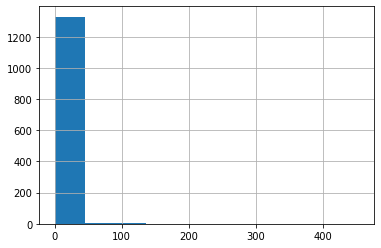

In [21]:
tweet_df["favorite_count"].hist() # create a histogram show the favorite count